In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab

In [2]:
data = pd.read_csv('./data_f.csv')

In [3]:
data.head()

,Unnamed: 0,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,...,Source_S143,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI
0,0,2.0,8000.0,1.0,2000.0,20000.0,5,13.50,1.0,33.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,460.000000
1,1,4.0,5700.0,1.0,0.0,100000.0,5,15.25,0.0,40.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2392.000000
2,2,4.0,1200.0,0.0,0.0,16400.0,4,27.70,0.0,35.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,568.763478
3,3,4.0,1724.6,0.0,0.0,23400.0,4,24.28,0.0,57.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,744.869404
4,4,3.0,5000.0,1.0,0.0,30000.0,3,15.75,1.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1051.000000


In [4]:
data.shape

(2040, 36)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Monthly_Income            2040 non-null   float64
 1   Contacted                 2040 non-null   float64
 2   Existing_EMI              2040 non-null   float64
 3   Loan_Amount               2040 non-null   float64
 4   Loan_Period               2040 non-null   int64  
 5   Interest_Rate             2040 non-null   float64
 6   Approved                  2040 non-null   float64
 7   Age                       2040 non-null   float64
 8   Gender_Female             2040 non-null   float64
 9   Gender_Male               2040 non-null   float64
 10  City_Category_A           2040 non-null   float64
 11  City_Category_B           2040 non-null   float64
 12  City_Category_C           2040 non-null   float64
 13  City_Category_Other       2040 non-null   float64
 14  Employer

In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data.describe()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S143,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,...,2040.000000,2040.000000,2040.0,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,3.660686,4916.964314,0.734804,610.937549,43121.470588,3.873039,18.076126,0.500000,35.850490,0.342157,...,0.063235,0.107353,0.0,0.461275,0.158333,0.002941,0.016667,0.005882,0.354902,1264.362684
std,0.859316,6400.732581,0.441546,1376.082105,32092.530055,1.054688,5.014889,0.500123,7.083728,0.474548,...,0.243445,0.309637,0.0,0.498620,0.365143,0.054166,0.128050,0.076489,0.478601,821.551780
min,1.000000,0.000000,0.000000,0.000000,5000.000000,1.000000,11.990000,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.888549
25%,4.000000,2254.500000,0.000000,0.000000,20000.000000,3.000000,14.850000,0.000000,31.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,711.718966
50%,4.000000,3600.000000,1.000000,0.000000,33000.000000,4.000000,16.090000,0.500000,34.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1048.402414
75%,4.000000,5500.000000,1.000000,724.800000,52000.000000,5.000000,20.000000,1.000000,39.000000,1.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1521.948167
max,4.000000,100000.000000,1.000000,30000.000000,250000.000000,5.000000,37.000000,1.000000,87.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6623.000000


In [5]:
one_hot_encoded = pd.get_dummies(data['Employer_Category2'])
data = data.drop('Employer_Category2', axis=1)


data = pd.concat([data, one_hot_encoded], axis=1)
data.head()

,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,Gender_Male,...,2.0,2.2,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0
0,8000.0,1.0,2000.0,20000.0,5,13.50,1.0,33.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,5700.0,1.0,0.0,100000.0,5,15.25,0.0,40.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1200.0,0.0,0.0,16400.0,4,27.70,0.0,35.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,1724.6,0.0,0.0,23400.0,4,24.28,0.0,57.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,5000.0,1.0,0.0,30000.0,3,15.75,1.0,51.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
data['Source'] = data['Source'].apply(lambda x: 'S122' if x=='S122' else('S133' if x=='S133' else ('S143' if x=='S143' else('S134' if x=='S134' else 'S_others'))))

In [21]:
col = ['ID','DOB','Born_year','Lead_Creation_Date','City_Code','Employer_Code','Customer_Existing_Primary_Bank_Code','Var1']
data.drop(columns=col, axis =1, inplace=True)

In [22]:
data.head(10)

,Gender,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Approved,Age
0,Female,A,A,4.0,2000.0,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,41.0
1,Male,A,C,1.0,3500.0,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,0,34.0
2,Male,C,C,4.0,2250.0,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,38.0
3,Male,C,A,4.0,3500.0,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,0,31.0
4,Male,A,A,4.0,10000.0,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,0,35.0
5,Female,C,A,4.0,7000.0,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,32.0
6,Male,B,B,4.0,7500.0,G,Y,S122,C,0.0,130000.0,5.0,14.85,3082.0,0,47.0
7,Female,A,A,4.0,3000.0,P,Y,S133,B,0.0,30000.0,3.0,18.25,1088.0,0,30.0
8,Male,A,A,4.0,2500.0,G,Y,S133,B,0.0,66000.0,5.0,20.00,1749.0,0,43.0
9,Female,B,A,4.0,2500.0,Other,N,S122,B,0.0,NaN,NaN,NaN,NaN,0,30.0


In [23]:
data.isnull().sum()

Gender                    0
City_Category             0
Employer_Category1        0
Employer_Category2     4298
Monthly_Income            0
Primary_Bank_Type         0
Contacted                 0
Source                    0
Source_Category           0
Existing_EMI             51
Loan_Amount           27709
Loan_Period           27709
Interest_Rate         47437
EMI                   47437
Approved                  0
Age                      15
dtype: int64

In [24]:
df = data.drop(columns='EMI', axis = 1)

In [25]:
df.head()

,Gender,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age
0,Female,A,A,4.0,2000.0,P,N,S122,G,0.0,NaN,NaN,NaN,0,41.0
1,Male,A,C,1.0,3500.0,P,Y,S122,G,0.0,20000.0,2.0,13.25,0,34.0
2,Male,C,C,4.0,2250.0,G,Y,S143,B,0.0,45000.0,4.0,NaN,0,38.0
3,Male,C,A,4.0,3500.0,G,Y,S143,B,0.0,92000.0,5.0,NaN,0,31.0
4,Male,A,A,4.0,10000.0,P,Y,S134,B,2500.0,50000.0,2.0,NaN,0,35.0


In [27]:
dumm = [dumm for dumm in df.columns if df[dumm].dtype=='O']

In [28]:
dumm.remove('Contacted')

In [29]:
dumm

['Gender',
 'City_Category',
 'Employer_Category1',
 'Primary_Bank_Type',
 'Source',
 'Source_Category']

In [30]:
df = pd.get_dummies(data = df, columns=dumm)

In [31]:
df['Contacted'] = df['Contacted'].apply(lambda x: 1 if x=='Y' else 0)

In [32]:
df.head()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S134,Source_S143,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G
0,4.0,2000.0,0,0.0,NaN,NaN,NaN,0,41.0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,3500.0,1,0.0,20000.0,2.0,13.25,0,34.0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.0,2250.0,1,0.0,45000.0,4.0,NaN,0,38.0,0,...,0,1,0,0,1,0,0,0,0,0
3,4.0,3500.0,1,0.0,92000.0,5.0,NaN,0,31.0,0,...,0,1,0,0,1,0,0,0,0,0
4,4.0,10000.0,1,2500.0,50000.0,2.0,NaN,0,35.0,0,...,1,0,0,0,1,0,0,0,0,0


In [37]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

In [38]:
df_imputed = pd.DataFrame(df_imputed)

In [39]:
df_imputed.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64

In [40]:
df_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,4.0,2000.0,0.0,0.0,25200.0,3.6,28.500,0.0,41.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3500.0,1.0,0.0,20000.0,2.0,13.250,0.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,2250.0,1.0,0.0,45000.0,4.0,16.298,0.0,38.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,3500.0,1.0,0.0,92000.0,5.0,20.000,0.0,31.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,10000.0,1.0,2500.0,50000.0,2.0,14.380,0.0,35.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_imputed.columns = df.columns

In [42]:
df_imputed['EMI'] = data['EMI']

In [43]:
df_imputed['EMI'].fillna( ((df_imputed['Loan_Amount']*(df_imputed['Interest_Rate']/1200)*((1 + (df_imputed['Interest_Rate']/1200))**(df_imputed['Loan_Period']*12)))/(((1 + (df_imputed['Interest_Rate']/1200))**(12*df_imputed['Loan_Period'])) - 1)),inplace=True)

In [44]:
df_imputed['EMI'].isnull().sum()

0

In [45]:
df_imputed.columns

Index(['Employer_Category2', 'Monthly_Income', 'Contacted', 'Existing_EMI',
       'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'Approved', 'Age',
       'Gender_Female', 'Gender_Male', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'City_Category_Other', 'Employer_Category1_A',
       'Employer_Category1_B', 'Employer_Category1_C',
       'Employer_Category1_Other', 'Primary_Bank_Type_G',
       'Primary_Bank_Type_Other', 'Primary_Bank_Type_P', 'Source_S122',
       'Source_S133', 'Source_S134', 'Source_S143', 'Source_S_others',
       'Source_Category_A', 'Source_Category_B', 'Source_Category_C',
       'Source_Category_D', 'Source_Category_E', 'Source_Category_F',
       'Source_Category_G', 'EMI'],
      dtype='object')

In [46]:
df_imputed.head()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S143,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI
0,4.0,2000.0,0.0,0.0,25200.0,3.6,28.500,0.0,41.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,939.210873
1,1.0,3500.0,1.0,0.0,20000.0,2.0,13.250,0.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,953.000000
2,4.0,2250.0,1.0,0.0,45000.0,4.0,16.298,0.0,38.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1282.191042
3,4.0,3500.0,1.0,0.0,92000.0,5.0,20.000,0.0,31.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2437.437302
4,4.0,10000.0,1.0,2500.0,50000.0,2.0,14.380,0.0,35.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2409.629784


In [35]:
df_imputed = pd.read_csv('./nullremoved.csv')

<AxesSubplot:xlabel='Approved', ylabel='count'>

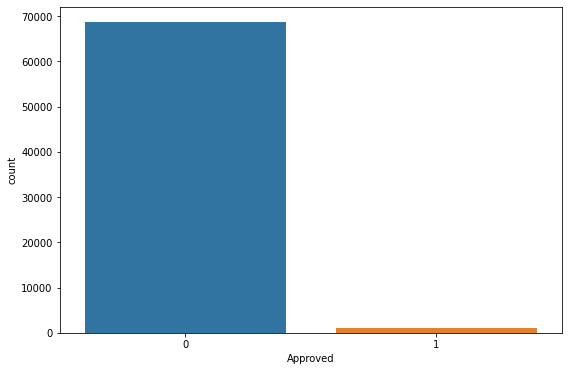

In [62]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x='Approved')

In [49]:
data['Gender'].value_counts()

Male      39949
Female    29764
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Approved', ylabel='count'>

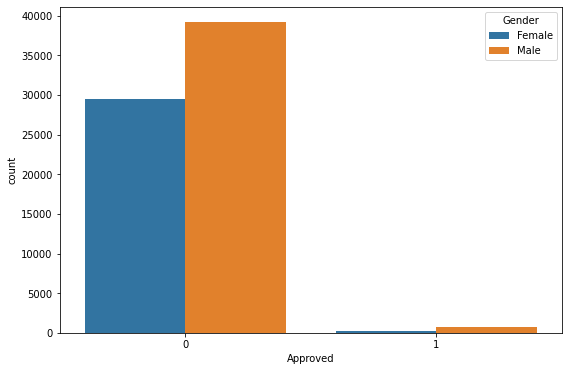

In [64]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x = 'Approved', hue='Gender')

In [51]:
data.groupby('Gender')['Approved'].value_counts()

Gender  Approved
Female  0           29516
        1             248
Male    0           39177
        1             772
Name: Approved, dtype: int64

<AxesSubplot:xlabel='Approved', ylabel='count'>

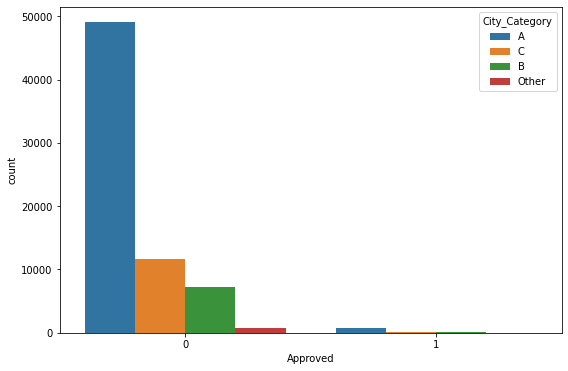

In [65]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x = 'Approved', hue='City_Category')

In [53]:
data['City_Category'].value_counts()

A        49885
C        11694
B         7320
Other      814
Name: City_Category, dtype: int64

In [54]:
data.groupby('City_Category')['Approved'].value_counts()

City_Category  Approved
A              0           49059
               1             826
B              0            7222
               1              98
C              0           11600
               1              94
Other          0             812
               1               2
Name: Approved, dtype: int64

In [55]:
data.groupby('Employer_Category1')['Approved'].value_counts()

Employer_Category1  Approved
A                   0           32975
                    1             361
B                   0           17704
                    1             352
C                   0           14001
                    1             302
Other               0            4013
                    1               5
Name: Approved, dtype: int64

<AxesSubplot:xlabel='Employer_Category1', ylabel='count'>

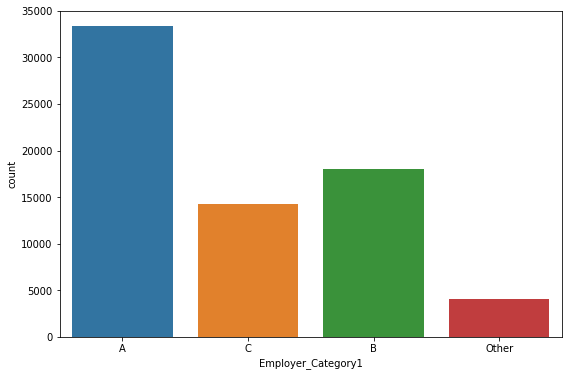

In [66]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x='Employer_Category1')

In [57]:
df_imputed.groupby('Employer_Category2')['Approved'].value_counts()

Employer_Category2  Approved
1.0                 0.0          4168
                    1.0            90
1.6                 0.0             2
2.0                 0.0          1903
                    1.0            55
2.2                 0.0            15
2.4                 0.0             5
2.6                 0.0            23
2.8                 0.0            69
                    1.0             1
3.0                 0.0          1704
                    1.0            30
3.2                 0.0            74
3.4                 0.0           818
                    1.0             1
3.6                 0.0           143
                    1.0             1
3.8                 0.0           320
                    1.0             2
4.0                 0.0         59449
                    1.0           840
Name: Approved, dtype: int64

<AxesSubplot:xlabel='Employer_Category2', ylabel='count'>

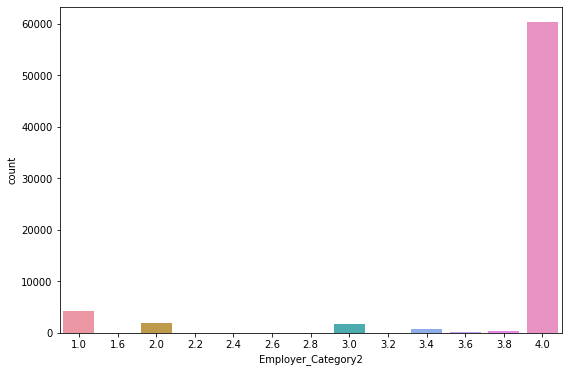

In [67]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_imputed, x='Employer_Category2')

<AxesSubplot:xlabel='Primary_Bank_Type', ylabel='count'>

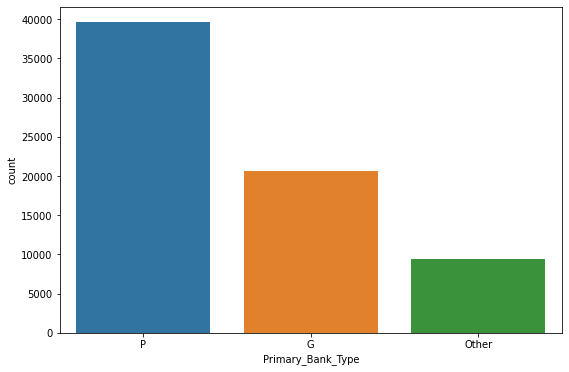

In [70]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x='Primary_Bank_Type')

In [60]:
data.groupby('Primary_Bank_Type')['Approved'].value_counts()

Primary_Bank_Type  Approved
G                  0           20507
                   1             196
Other              0            9371
                   1              20
P                  0           38815
                   1             804
Name: Approved, dtype: int64

In [61]:
data.groupby('Contacted')['Approved'].value_counts()

Contacted  Approved
N          0           24265
           1             173
Y          0           44428
           1             847
Name: Approved, dtype: int64

<AxesSubplot:xlabel='Source_Category', ylabel='count'>

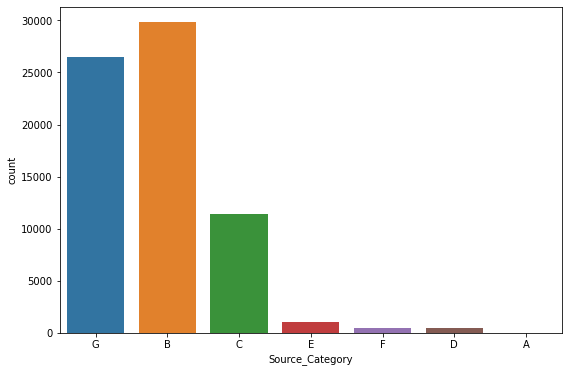

In [71]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x='Source_Category')

In [63]:
data.groupby('Source_Category')['Approved'].value_counts()

Source_Category  Approved
A                0               3
B                0           29317
                 1             495
C                0           11234
                 1             140
D                0             497
E                0            1035
                 1              15
F                0             453
                 1               6
G                0           26154
                 1             364
Name: Approved, dtype: int64

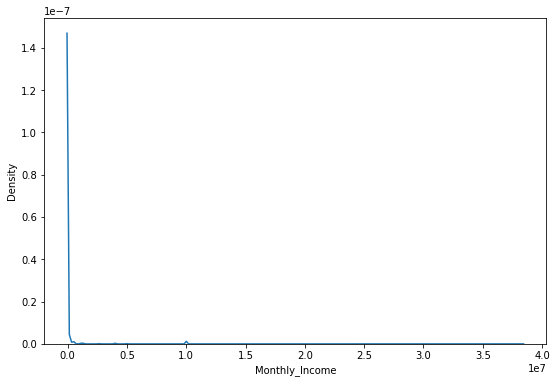

In [72]:
plt.figure(figsize=(9,6))
sns.kdeplot(data['Monthly_Income'])
plt.show()

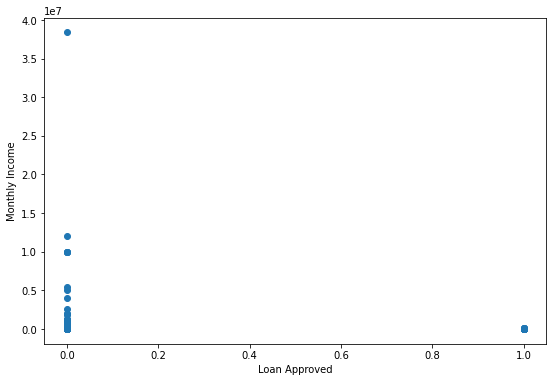

In [73]:
plt.figure(figsize=(9,6))
plt.scatter(y=data['Monthly_Income'], x=data['Approved'])
plt.ylabel('Monthly Income')
plt.xlabel('Loan Approved')
plt.show()

<AxesSubplot:xlabel='Loan_Amount', ylabel='Density'>

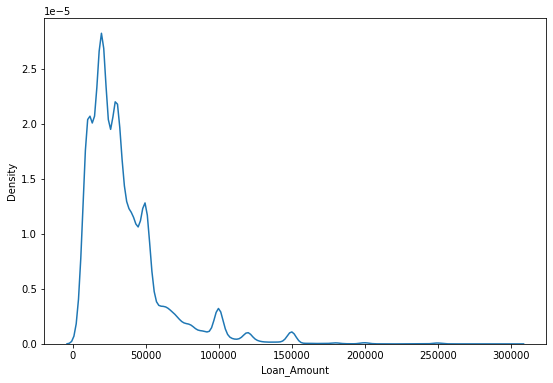

In [74]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_imputed['Loan_Amount'])

<Figure size 648x432 with 0 Axes>

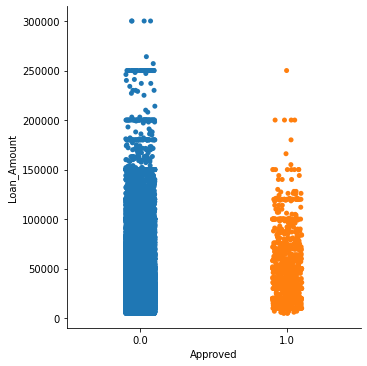

In [75]:
plt.figure(figsize=(9,6))
sns.catplot(x='Approved', y='Loan_Amount', data = df_imputed)

<AxesSubplot:xlabel='Approved', ylabel='Loan_Amount'>

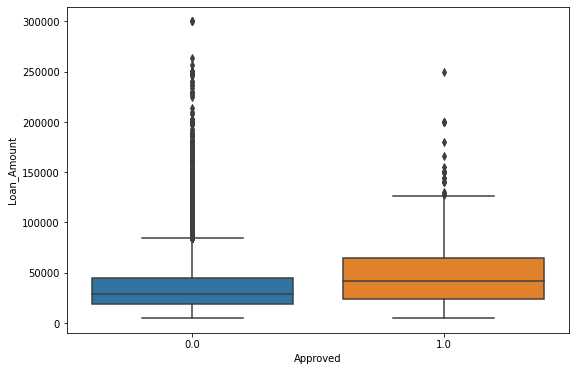

In [76]:
plt.figure(figsize=(9,6))
sns.boxplot(data = df_imputed, x='Approved', y= 'Loan_Amount')

<AxesSubplot:xlabel='Existing_EMI', ylabel='Density'>

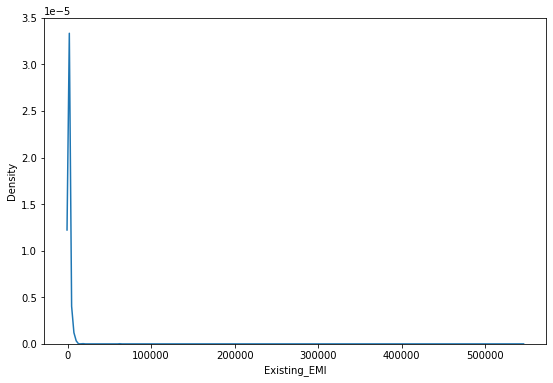

In [77]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_imputed['Existing_EMI'])

<AxesSubplot:xlabel='Approved', ylabel='Existing_EMI'>

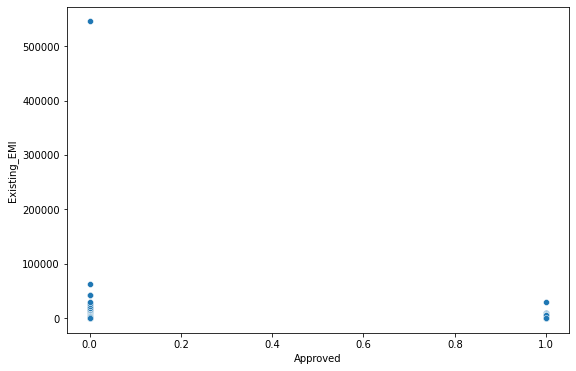

In [78]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df_imputed['Approved'], y=df_imputed['Existing_EMI'])

In [70]:
df_imputed['Loan_Period'].value_counts()

5.0    16999
4.0    16247
3.0     8882
2.0     4314
3.8     4016
4.2     3040
3.6     2985
4.4     2583
3.4     2341
3.2     2179
1.0     1886
4.6     1557
2.8     1093
4.8      625
2.6      557
2.4      318
2.2       59
1.8       22
1.6        6
1.4        2
1.2        1
6.0        1
Name: Loan_Period, dtype: int64

In [81]:
def round_off(a):
    n = int(a%10)
    rem = a%n;
    if(rem>=0.5):
        n = n+1
    return n    

In [82]:
df_imputed['Loan_Period'] = df_imputed['Loan_Period'].apply(round_off)

In [83]:
df_imputed['Loan_Period'].value_counts()

4    28871
5    19181
3    15052
2     4719
1     1889
6        1
Name: Loan_Period, dtype: int64

In [88]:
df_imputed.to_csv('./df_imputed.csv')

<AxesSubplot:xlabel='Approved', ylabel='Loan_Period'>

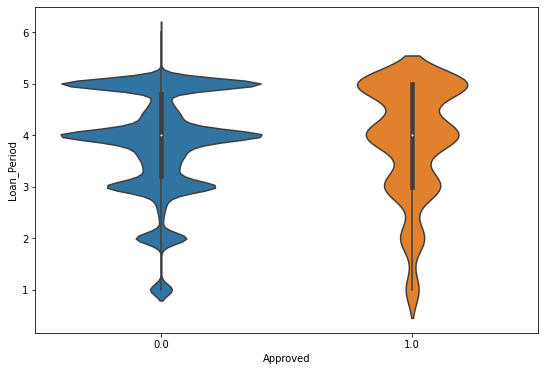

In [79]:
plt.figure(figsize=(9,6))
sns.violinplot(data=df_imputed, x='Approved', y='Loan_Period')

<AxesSubplot:xlabel='Loan_Period', ylabel='count'>

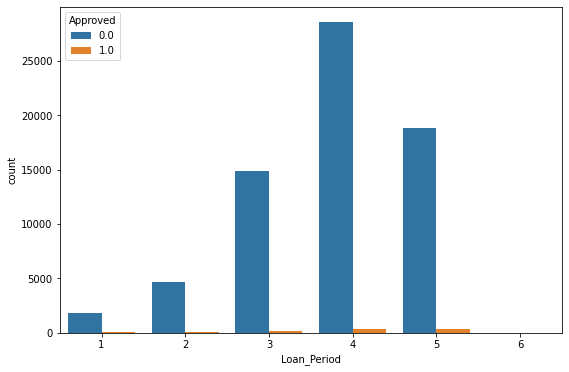

In [84]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_imputed, x='Loan_Period', hue='Approved')

In [76]:
data.groupby('Loan_Period')['Approved'].value_counts()

Loan_Period  Approved
1.0          0            1844
             1              42
2.0          0            4190
             1              76
3.0          0            6903
             1             156
4.0          0           11907
             1             232
5.0          0           16314
             1             339
6.0          0               1
Name: Approved, dtype: int64

<Figure size 648x432 with 0 Axes>

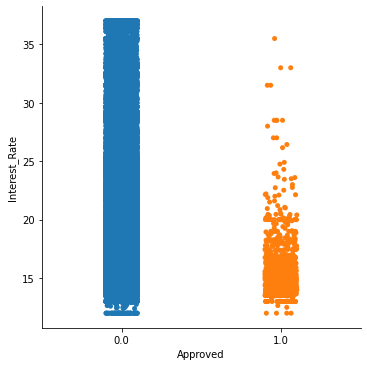

In [85]:
plt.figure(figsize=(9,6))
sns.catplot(data=df_imputed, x='Approved', y='Interest_Rate')

<AxesSubplot:xlabel='Interest_Rate', ylabel='Density'>

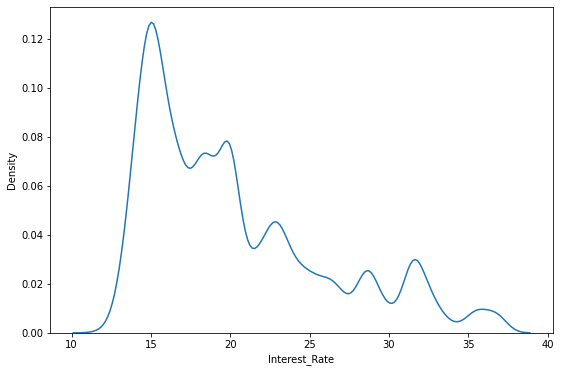

In [86]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_imputed['Interest_Rate'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

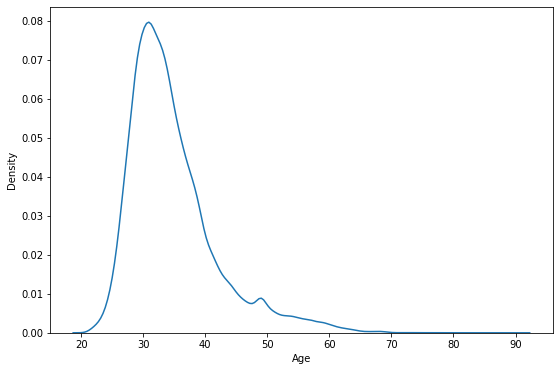

In [87]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_imputed['Age'])

In [89]:
df_imputed.columns

Index(['Unnamed: 0', 'Employer_Category2', 'Monthly_Income', 'Contacted',
       'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'Approved', 'Age', 'Gender_Female', 'Gender_Male', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'City_Category_Other',
       'Employer_Category1_A', 'Employer_Category1_B', 'Employer_Category1_C',
       'Employer_Category1_Other', 'Primary_Bank_Type_G',
       'Primary_Bank_Type_Other', 'Primary_Bank_Type_P', 'Source_S122',
       'Source_S133', 'Source_S134', 'Source_S143', 'Source_S_others',
       'Source_Category_A', 'Source_Category_B', 'Source_Category_C',
       'Source_Category_D', 'Source_Category_E', 'Source_Category_F',
       'Source_Category_G', 'EMI'],
      dtype='object')

In [90]:
df_imputed = pd.get_dummies(data=df_imputed, columns=['Employer_Category2','Loan_Period'])

In [ ]:
df_imputed.to_csv('df_imputed_2.csv')

In [3]:
df_imputed = pd.read_csv('./df_imputed2.csv')

In [4]:
data_0 = df_imputed[df_imputed['Approved']==0]

In [5]:
data_0.head()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S143,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI
0,4.0,2000.0,0.0,0.0,25200.0,4,28.500,0.0,41.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,939.210873
1,1.0,3500.0,1.0,0.0,20000.0,2,13.250,0.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,953.000000
2,4.0,2250.0,1.0,0.0,45000.0,4,16.298,0.0,38.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1282.191042
3,4.0,3500.0,1.0,0.0,92000.0,5,20.000,0.0,31.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2437.437302
4,4.0,10000.0,1.0,2500.0,50000.0,2,14.380,0.0,35.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2409.629784


In [6]:
data_0.shape

(68693, 35)

In [7]:
data_1 = df_imputed[df_imputed['Approved']==1]

In [8]:
data_1.shape

(1020, 35)

In [9]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(data_0)
    wcss.append(kmeans.inertia_)

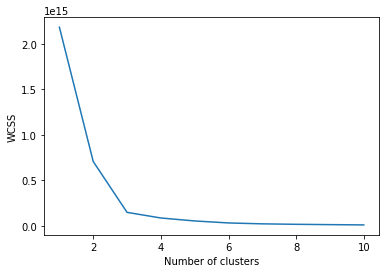

In [10]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
#clustering required is 3

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
clust = kmeans.fit_predict(data_0)

In [13]:
clust = pd.DataFrame(clust)

In [14]:
clust.value_counts()

0    68685
2        7
1        1
dtype: int64

In [15]:
data_1.shape

(1020, 35)

In [16]:
data_0['clust'] = clust

<ipython-input-16-3f7b87f6a952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['clust'] = clust


In [17]:
data_0.head()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI,clust
0,4.0,2000.0,0.0,0.0,25200.0,4,28.500,0.0,41.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,939.210873,0.0
1,1.0,3500.0,1.0,0.0,20000.0,2,13.250,0.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,953.000000,0.0
2,4.0,2250.0,1.0,0.0,45000.0,4,16.298,0.0,38.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1282.191042,0.0
3,4.0,3500.0,1.0,0.0,92000.0,5,20.000,0.0,31.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2437.437302,0.0
4,4.0,10000.0,1.0,2500.0,50000.0,2,14.380,0.0,35.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2409.629784,0.0


In [18]:
data_0['clust'].value_counts()

0.0    67679
2.0        7
1.0        1
Name: clust, dtype: int64

In [19]:
data_0 = data_0[data_0['clust']==0]

In [20]:
data_0['clust'].value_counts()

0.0    67679
Name: clust, dtype: int64

In [21]:
data_0 = data_0.sample(frac=1)
data_0.head()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI,clust
35024,4.0,1200.0,0.0,0.0,15400.0,3,33.400,0.0,44.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,636.192888,0.0
51812,4.0,4420.0,1.0,0.0,79000.0,4,15.892,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2234.514909,0.0
22956,4.0,4050.0,1.0,0.0,50000.0,5,15.140,0.0,30.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1193.174049,0.0
34367,4.0,1800.0,1.0,493.4,10000.0,2,31.500,0.0,31.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,567.000000,0.0
8714,1.0,3000.0,1.0,0.0,49000.0,5,13.000,0.0,29.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1115.000000,0.0


In [22]:
data_0 = data_0.iloc[:1020,:]

In [23]:
data_0.shape

(1020, 36)

In [24]:
data_0.head()

,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,...,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI,clust
35024,4.0,1200.0,0.0,0.0,15400.0,3,33.400,0.0,44.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,636.192888,0.0
51812,4.0,4420.0,1.0,0.0,79000.0,4,15.892,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2234.514909,0.0
22956,4.0,4050.0,1.0,0.0,50000.0,5,15.140,0.0,30.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1193.174049,0.0
34367,4.0,1800.0,1.0,493.4,10000.0,2,31.500,0.0,31.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,567.000000,0.0
8714,1.0,3000.0,1.0,0.0,49000.0,5,13.000,0.0,29.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1115.000000,0.0


In [28]:
data_0 = data_0.reset_index()

In [29]:
data_0.head()

,index,Employer_Category2,Monthly_Income,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,...,Source_S_others,Source_Category_A,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,EMI,clust
0,35024,4.0,1200.0,0.0,0.0,15400.0,3,33.400,0.0,44.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,636.192888,0.0
1,51812,4.0,4420.0,1.0,0.0,79000.0,4,15.892,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2234.514909,0.0
2,22956,4.0,4050.0,1.0,0.0,50000.0,5,15.140,0.0,30.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1193.174049,0.0
3,34367,4.0,1800.0,1.0,493.4,10000.0,2,31.500,0.0,31.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,567.000000,0.0
4,8714,1.0,3000.0,1.0,0.0,49000.0,5,13.000,0.0,29.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1115.000000,0.0


In [30]:
data_0.drop(columns=['index'], axis =1, inplace=True)

In [31]:
data_0.columns

Index(['Employer_Category2', 'Monthly_Income', 'Contacted', 'Existing_EMI',
       'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'Approved', 'Age',
       'Gender_Female', 'Gender_Male', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'City_Category_Other', 'Employer_Category1_A',
       'Employer_Category1_B', 'Employer_Category1_C',
       'Employer_Category1_Other', 'Primary_Bank_Type_G',
       'Primary_Bank_Type_Other', 'Primary_Bank_Type_P', 'Source_S122',
       'Source_S133', 'Source_S134', 'Source_S143', 'Source_S_others',
       'Source_Category_A', 'Source_Category_B', 'Source_Category_C',
       'Source_Category_D', 'Source_Category_E', 'Source_Category_F',
       'Source_Category_G', 'EMI', 'clust'],
      dtype='object')

In [32]:
data_f = data_0.append(data_1)

In [35]:
data_f.shape

(2040, 36)

In [37]:
data_f = data_f.sample(frac=1)

In [41]:
data_f.reset_index(inplace=True)

In [53]:
data_f.drop(columns=['index','clust'], axis = 1, inplace=True)

In [54]:
data_f.to_csv('./data_f.csv')

In [2]:
data_f = pd.read_csv('./data_f.csv')

In [6]:
def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    data = data[data[col]>0]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    data = data[data[col]>0]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))
    

def exponential_master(data,col,e):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col]**e)
    
    plt.subplot(1,3,2)
    stats.probplot(data[col]**e,dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col]**e)
    
def boxcox_master(data, col):
    plt.figure(figsize=(16, 4))
    plt.tight_layout()

    z,param=stats.boxcox(data[col])
    
    plt.subplot(1, 3, 1)
    sns.distplot(z, bins=30)
    plt.title('Box-Cox Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(z, dist="norm", plot=pylab)
    plt.ylabel('Box-Cox RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=z)
    plt.title('Box-Cox Boxplot')

In [24]:
data.head()

,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,Gender_Male,City_Category_A,...,3.0,3.2,3.4,3.6,3.8,4.0,Net EMI,EMI%,Monthly_Income_cat,Senior Citizen
0,1.0,2000.0,20000.0,5,13.50,1.0,33.0,0.0,1.0,1.0,...,0,0,0,0,0,0,2460.000000,7540.000000,4.0,0.0
1,1.0,0.0,100000.0,5,15.25,0.0,40.0,1.0,0.0,1.0,...,0,0,0,0,0,1,2392.000000,3308.000000,2.0,0.0
2,0.0,0.0,16400.0,4,27.70,0.0,35.0,1.0,0.0,0.0,...,0,0,0,0,0,1,568.763478,631.236522,0.0,0.0
3,0.0,0.0,23400.0,4,24.28,0.0,57.0,1.0,0.0,0.0,...,0,0,0,0,0,1,744.869404,979.730596,0.0,0.0
4,1.0,0.0,30000.0,3,15.75,1.0,51.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1051.000000,3949.000000,2.0,0.0


In [15]:
data['Net EMI'] = data['Existing_EMI'] + data['EMI']

In [16]:
data['EMI%'] = data['Monthly_Income'] - data['EMI']

In [16]:
data['Monthly_Income'].describe()

count      2040.000000
mean       4916.964314
std        6400.732581
min           0.000000
25%        2254.500000
50%        3600.000000
75%        5500.000000
max      100000.000000
Name: Monthly_Income, dtype: float64

In [43]:
for i in range(len(data['EMI'])):
    data.loc[i,'Monthly_Income_cat'] = int(data.loc[i,'Monthly_Income']/2000)

In [44]:
data.drop('Monthly_Income',axis=1,inplace=True)

In [45]:
data['Age'].describe()

count    2040.000000
mean       35.850490
std         7.083728
min        22.000000
25%        31.000000
50%        34.000000
75%        39.000000
max        87.000000
Name: Age, dtype: float64

In [46]:
for i in range(len(data['EMI'])):
    data.loc[i,'Senior Citizen'] = int(data.loc[i,'Age']/60)

In [47]:
data.columns

Index([               'Contacted',             'Existing_EMI',
                    'Loan_Amount',              'Loan_Period',
                  'Interest_Rate',                 'Approved',
                            'Age',            'Gender_Female',
                    'Gender_Male',          'City_Category_A',
                'City_Category_B',          'City_Category_C',
            'City_Category_Other',     'Employer_Category1_A',
           'Employer_Category1_B',     'Employer_Category1_C',
       'Employer_Category1_Other',      'Primary_Bank_Type_G',
        'Primary_Bank_Type_Other',      'Primary_Bank_Type_P',
                    'Source_S122',              'Source_S133',
                    'Source_S134',              'Source_S143',
                'Source_S_others',        'Source_Category_A',
              'Source_Category_B',        'Source_Category_C',
              'Source_Category_D',        'Source_Category_E',
              'Source_Category_F',        'Source_Categ

In [18]:
from sklearn.model_selection import train_test_split

In [48]:
training, testing = train_test_split(data, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 2040; training sample size = 1632, testing sample size = 408


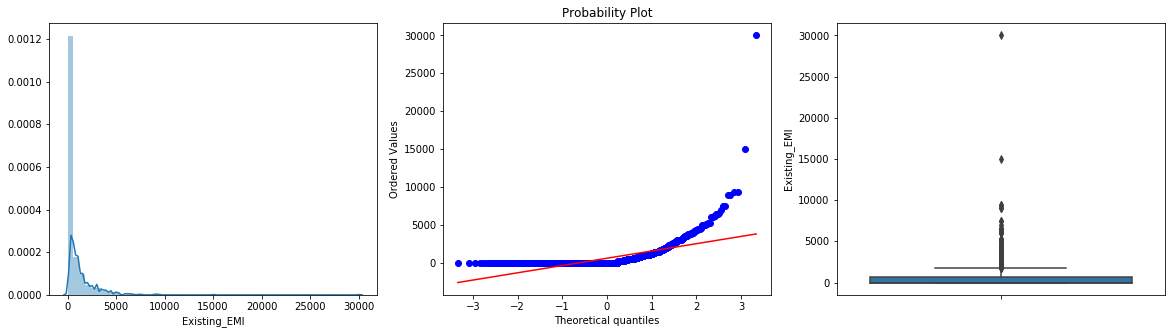

In [20]:
masterplot(training,'Existing_EMI')

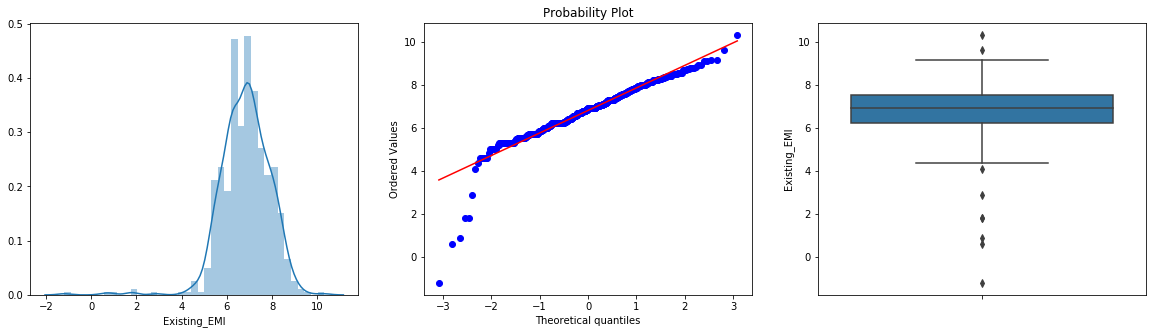

In [21]:
log_master(training,'Existing_EMI')

In [49]:
training['Existing_EMI'] = np.log(training['Existing_EMI'])
testing['Existing_EMI'] = np.log(testing['Existing_EMI'])

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


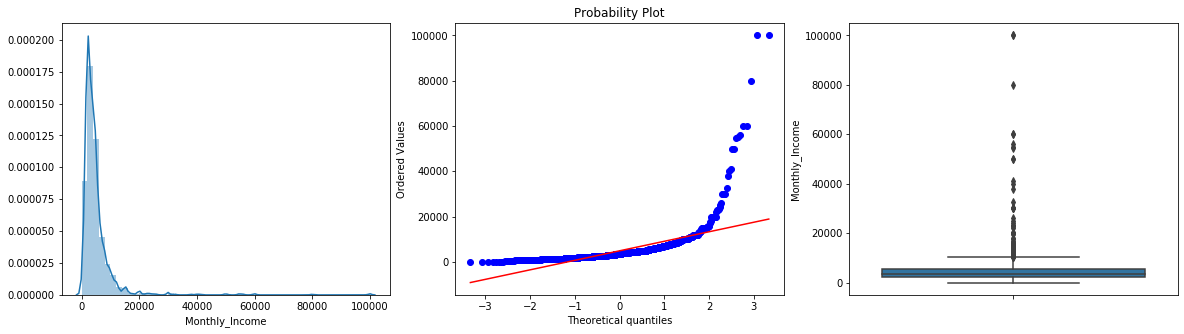

In [23]:
masterplot(training,'Monthly_Income')

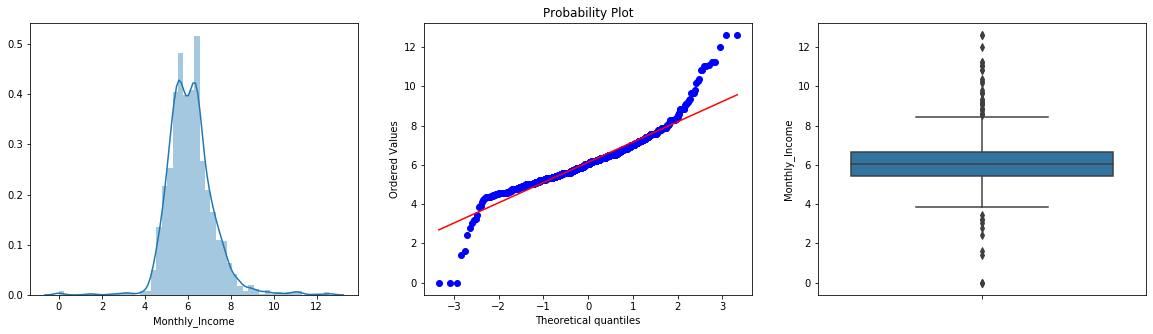

In [29]:
exponential_master(training,'Monthly_Income',0.22)

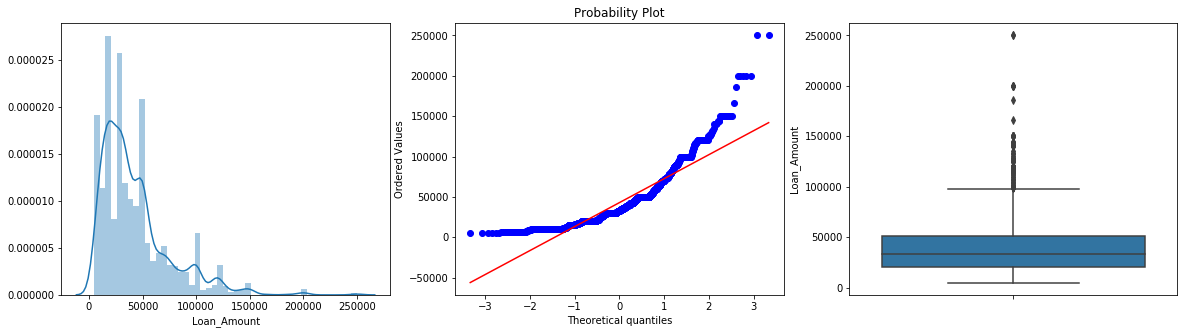

In [31]:
masterplot(training,'Loan_Amount')

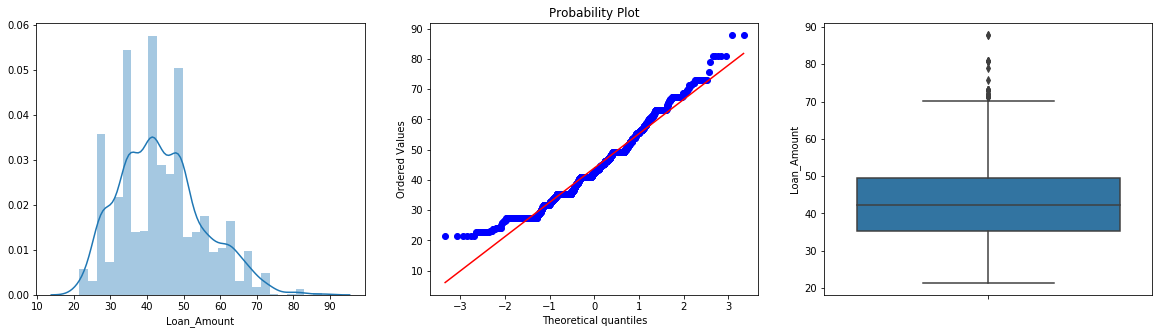

In [34]:
exponential_master(training,'Loan_Amount',0.36)

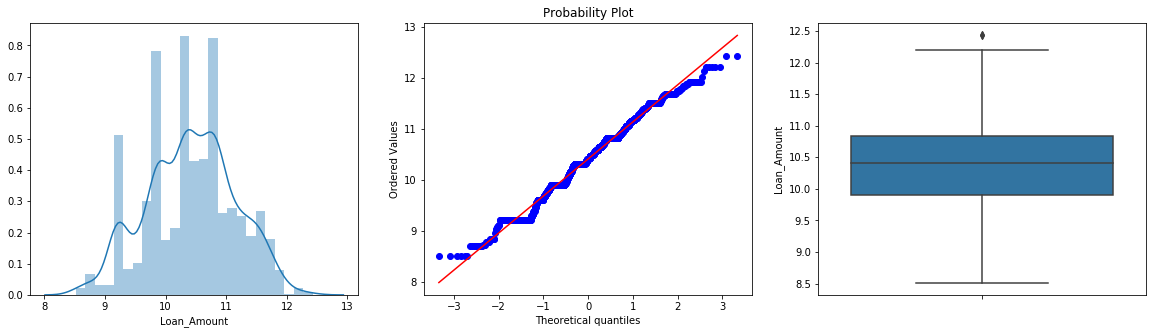

In [35]:
log_master(training,'Loan_Amount')

In [51]:
training['Loan_Amount'] = np.log(training['Loan_Amount'])
testing['Loan_Amount'] = np.log(testing['Loan_Amount'])

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


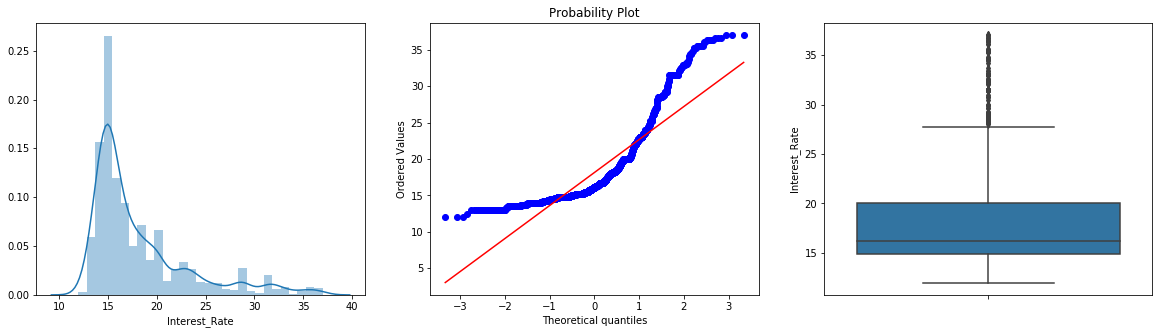

In [37]:
masterplot(training,'Interest_Rate')

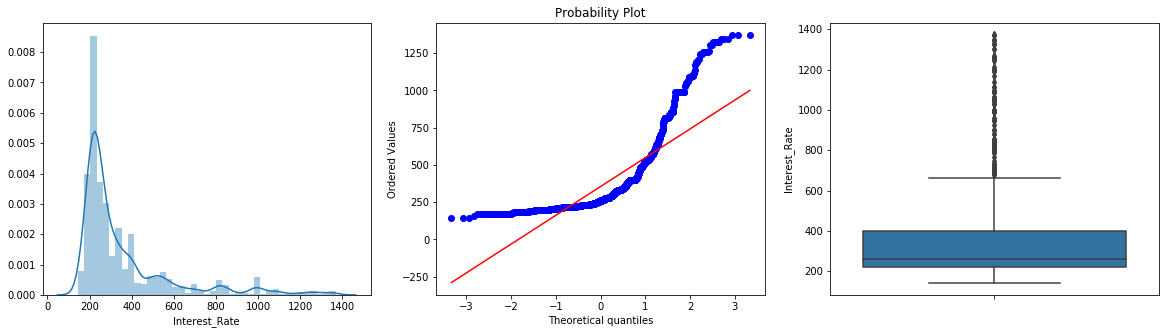

In [42]:
exponential_master(training,'Interest_Rate',2)

In [55]:
training.dropna(inplace=True)
testing.dropna(inplace=True)

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
df_train_s = training.loc[:,data.columns]
X_train = df_train_s.drop(['Approved'], axis=1)
Y_train = df_train_s.loc[:, ['Approved']]

df_test_s = testing.loc[:,data.columns]
X_test = df_test_s.drop(['Approved'], axis=1)
Y_test = df_test_s.loc[:, ['Approved']]

In [59]:
training.describe()

,Contacted,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,Approved,Age,Gender_Female,Gender_Male,City_Category_A,...,3.0,3.2,3.4,3.6,3.8,4.0,Net EMI,EMI%,Monthly_Income_cat,Senior Citizen
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,...,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,0.728554,-inf,10.413021,3.857843,18.160790,0.496324,35.756740,0.340686,0.659314,0.762255,...,0.023284,0.000613,0.006127,0.002451,0.003064,0.848039,1882.709959,3647.284587,2.031863,0.007966
std,0.444842,NaN,0.728746,1.058966,5.073967,0.500140,6.950576,0.474085,0.474085,0.425833,...,0.150851,0.024754,0.078062,0.049462,0.055283,0.359093,1719.673658,6065.206936,3.246121,0.088922
min,0.000000,-inf,8.517193,1.000000,11.990000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.888549,-1486.498370,0.000000,0.000000
25%,0.000000,-inf,9.903488,3.000000,14.850000,0.000000,31.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,929.786006,1340.488641,1.000000,0.000000
50%,1.000000,-inf,10.404263,4.000000,16.145000,0.000000,34.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1378.102525,2333.044257,1.000000,0.000000
75%,1.000000,6.551080,10.844469,5.000000,20.000000,1.000000,39.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2333.607227,4018.997485,2.000000,0.000000
max,1.000000,10.308953,12.429216,5.000000,37.000000,1.000000,69.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32635.951571,97725.000000,50.000000,1.000000


In [60]:
training.drop('Existing_EMI',axis=1,inplace=True)
testing.drop('Existing_EMI',axis=1,inplace=True)

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
data.drop('Existing_EMI',axis=1,inplace=True)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest = RandomForestClassifier(criterion='entropy')
forest.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
pred = forest.predict(X_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       198
         1.0       0.72      0.79      0.75       210

    accuracy                           0.73       408
   macro avg       0.74      0.73      0.73       408
weighted avg       0.73      0.73      0.73       408



<img src= "https://miro.medium.com/max/1872/1*pOtBHai4jFd-ujaNXPilRg.png">

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_aTmbpMnGM4_YNxJiAecUMs7vLcJX7fAkdg&usqp=CAU">

In [67]:
from sklearn.metrics import f1_score
f1_score(Y_test,pred)

0.7528344671201814

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,pred)

0.731096681096681

In [94]:
from sklearn.metrics import roc_curve

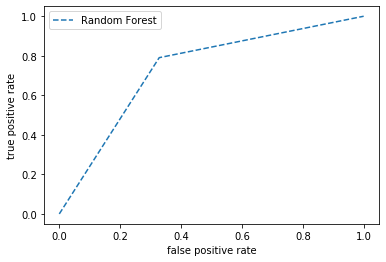

In [100]:
fpr, tpr, thresholds = roc_curve(Y_test, pred)
plt.plot(fpr,tpr,linestyle="--",label="Random Forest")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
gb = gbm.predict(X_test)

In [70]:
print(classification_report(Y_test,gb))

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       198
         1.0       0.73      0.80      0.76       210

    accuracy                           0.75       408
   macro avg       0.75      0.74      0.74       408
weighted avg       0.75      0.75      0.74       408



In [71]:
f1_score(Y_test,gb)

0.7647058823529411

In [82]:
roc_auc_score(Y_test,gb)

0.7432900432900433

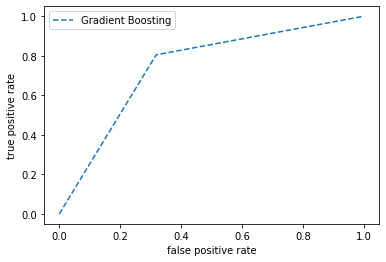

In [98]:
fpr, tpr, thresholds = roc_curve(Y_test, gb)
plt.plot(fpr,tpr,linestyle="--",label="Gradient Boosting")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()

In [75]:
import xgboost

In [76]:
from xgboost import XGBClassifier

In [77]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
xg_pred = xgb.predict(X_test)

In [79]:
print(classification_report(Y_test,xg_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.67      0.71       198
         1.0       0.72      0.81      0.76       210

    accuracy                           0.74       408
   macro avg       0.74      0.74      0.74       408
weighted avg       0.74      0.74      0.74       408



In [80]:
f1_score(Y_test,xg_pred)

0.7623318385650224

In [90]:
roc_auc_score(Y_test,xg_pred)

0.7380952380952381

In [86]:
from sklearn.ensemble import VotingClassifier

In [88]:
vot = VotingClassifier(estimators = [('rf',forest),('gb',gbm)])
vot.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
     

In [89]:
vote = vot.predict(X_test)

In [91]:
print(classification_report(Y_test,vote))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73       198
         1.0       0.75      0.75      0.75       210

    accuracy                           0.74       408
   macro avg       0.74      0.74      0.74       408
weighted avg       0.74      0.74      0.74       408



In [92]:
f1_score(Y_test,vote)

0.7476190476190476

In [93]:
roc_auc_score(Y_test,vote)

0.73997113997114

In [101]:
fpr, tpr, thresholds = roc_curve(Y_test, vote)

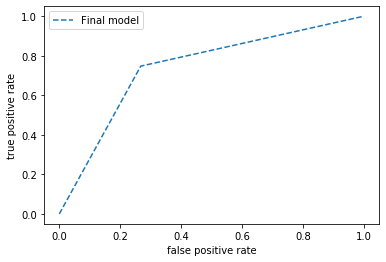

In [102]:
plt.plot(fpr,tpr,linestyle="--",label="Final model")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()